[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/accdavlo/calcolo-scientifico/blob/main/codes/transport_FD.ipynb)

# Transport equation

In this notebook we will solve the 1D Transport (hyperbolic) equation given 
$$\partial_t u +a\partial_{x} u = 0 .$$


In [31]:
try:
    from geometry import *
except ImportError:
    !wget https://raw.githubusercontent.com/accdavlo/calcolo-scientifico/refs/heads/main/codes/solutions/geometry.py -O geometry.py
    from geometry import *

try:
    import nodepy
except ImportError:
    !pip install nodepy
    import nodepy
    
import numpy as np
import matplotlib.pyplot as plt

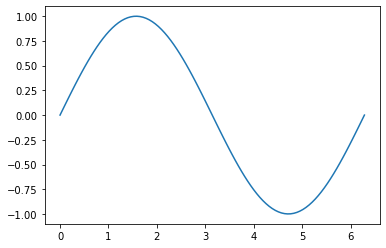

In [32]:
geom = Geometry1D(0,2*np.pi,100)
u0 = np.sin(geom.xx)
T_end = 1.
plt.plot(geom.xx,u0)

### Explicit Euler with central difference implementation
$$
\frac{u^{n+1}_i-u^n_i}{\Delta t} +a \frac{u_{i+1}^n-u_{i-1}^n}{2\Delta x}=0 
$$
In the following we are gonna use periodic boundary conditions, so `u[0]` must be equal to `u[-1]`. This means we have to be careful when we look for the $u_{i-1}$ when `i=0`

In [ ]:
Nx = 100
geom = Geometry1D(0,2*np.pi,Nx)
dt = 0.01
u0_lambda = lambda x: np.sin(x)
u_ex = lambda t,x, a: u0_lambda(x-a*t)
T_end = 1.

class Advection_explicit_euler:
    def __init__(self, geom, T_end, u0_lambda, dt, a=1, dt_save = 0.1, u_ex_lambda = None):
        self.geom = geom
        self.T_end = T_end
        self.u0_lambda = u0_lambda
        self.u0 = self.u0_lambda(self.geom.xx)
        self.set_dt(dt)
        self.a = a
        self.dt_save = dt_save
        self.Nt_save = np.int64(self.T_end//self.dt_save +2)
        if u_ex_lambda is not None:
            self.u_ex_lambda = u_ex_lambda



    def set_geom(self,dx=None,Nx=None):
        if Nx is None:
            Nx = np.int64((self.geom.x_right-self.geom.x_left)/dx)+1
        self.geom.set_N(Nx)
        self.u0 = self.u0_lambda(self.geom.xx)
        
    def set_dt(self,dt):
        self.dt = dt
        self.Nt = np.int64(self.T_end//self.dt+2)        
    
    def evolve(self):
        # Here is the implementation of the central FD formula evolution

        # Initialize the solution matrix of saved values
        self.U_sol=np.zeros((self.Nt_save,self.geom.N))
        self.U_sol[0] = self.u0
        
        # Running variables with previous and next solutions u^n and u^{n+1}
        un = np.copy(self.u0)
        un1 = np.copy(self.u0)

        # Iteration of the solutions
        it=0
        # Iteration of the saved solutions
        it_save = 0
        
        # Physical time
        time = 0.
        # Time since a solution has been saved set to 0
        time_save = 0.
        # List of saved times
        self.times = [time]
        while ( it<self.Nt and time<self.T_end):

            # Update time and auxiliary variable time_save
            # We might end a little over the final time
            time=time+self.dt
            time_save = time_save+self.dt
            
            # Update the number of iterations
            it+=1
            
            # Update the solution as un1[i] = un[i] -a dt/dx * (un[i+1]-un[i-1])/2
            # using vectors! Apply periodic BC! So particular care for un1[0] and un1[-1]!
            ???
            ???
            ???
            
            # Update the previous value with the next one
            un = un1

            # If more than dt_save time is passed from the last save, I save the solution
            if time_save>self.dt_save:
                # Update the saved iterations
                it_save +=1
                self.U_sol[it_save,:] = un1
                self.times.append(time)
                # Set to zero the time since a solution has been saved
                time_save = 0.

        # Save the error if there exists an exact solution
        if hasattr(self,"u_ex_lambda"):
            # Final time error
            self.u_ex_end = self.u_ex_lambda(time,self.geom.xx, self.a)
            # Compute the relative L2 error at the final time 
            self.error = ???
            # print("Final error ",self.error)
        return self.geom.xx, un1
    
# Setup the solver
FD_approx = Advection_explicit_euler(geom, T_end, u0_lambda, dt, dt_save = 0.1, u_ex_lambda = u_ex)
# Run the simulation
xx, un1 = FD_approx.evolve()
# Print the error
print("Final error ",FD_approx.error)

# Plot the solution at different times
fig,ax1 = plt.subplots(1,1,figsize=(4,5))
for it, time in enumerate(FD_approx.times):
    ax1.plot(geom.xx, ???, label="Time = %1.3f"%time)

ax1.legend()

fig.suptitle(r"Explicit Euler $\Delta x=%1.4f, \, \Delta t=%1.5f$"%(geom.dx,FD_approx.dt))
plt.tight_layout()
plt.savefig("adv_central_diff_exp_eul_dx_%1.4f_dt_%1.5f.pdf"%(geom.dx,dt))
plt.savefig("adv_central_diff_exp_eul_dx_%1.4f_dt_%1.5f.png"%(geom.dx,dt))
plt.show()


In [ ]:
# Play with dx and dt!
FD_approx.set_geom(dx=0.001)
FD_approx.set_dt(0.0001)
xx, un1 = FD_approx.evolve()

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
for it, time in enumerate(FD_approx.times):
    ax1.plot(geom.xx, FD_approx.U_sol[it], label="Time = %1.3f"%time)

ax2.plot(geom.xx, FD_approx.u_ex_end, label="Exact final time")
ax2.plot(geom.xx, un1, label="Approx final time")
ax1.legend()
ax2.legend()

fig.suptitle(r"Explicit Euler $\Delta x=%1.4f, \, \Delta t=%1.4f$"%(geom.dx,FD_approx.dt))
plt.show()

### Implicit Euler

$$
\frac{u^{n}_i-u^{n-1}_i}{\Delta t} +a \frac{u_{i+1}^n-u_{i-1}^n}{2\Delta x}=0 
\Longleftrightarrow u^{n}_i-\frac{\Delta t}{2\Delta x}(u_{i+1}^n-u_{i-1}^n) = u^{n-1}_i
$$

### Linear systems with matrix
$$
\begin{pmatrix}
1 &\frac{\Delta t}{2\Delta x} & 0&\dots & \dots\\
-\frac{\Delta t}{2\Delta x} &1 &\frac{\Delta t}{2\Delta x} &\dots & \dots\\
\vdots & \ddots & \ddots & \ddots &\vdots\\
0&\dots & \dots &1& \frac{\Delta t}{2\Delta x}  \\ 
0&\dots & \dots &-\frac{\Delta t}{2\Delta x} &1     
\end{pmatrix}
$$
with periodic boundary conditions, it becomes

$$
\begin{pmatrix}
1 &\frac{\Delta t}{2\Delta x} & 0&\dots & -\frac{\Delta t}{2\Delta x}\\
-\frac{\Delta t}{2\Delta x} &1 &\frac{\Delta t}{2\Delta x} &\dots & \dots\\
\vdots & \ddots & \ddots & \ddots &\vdots\\
0&\dots & \dots &1& \frac{\Delta t}{2\Delta x}  \\ 
\frac{\Delta t}{2\Delta x}&0 & \dots &-\frac{\Delta t}{2\Delta x} &1     
\end{pmatrix}
$$

In [ ]:
Nx = 2000
dt = 0.1
geom = Geometry1D(0,2*np.pi,Nx)
u0_lambda = lambda x: np.sin(x)
T_end = 1.





def assemble_deriv_matrix(geom):
    # Assemble derivative matrix with periodic boundary conditions. 
    # Use the np.diag function as it consists of 2 diagonals 0.5 on diag +1 and -0.5 on diag -1
    # Do not include dt or dx yet!
    deriv_matrix = ????
    
    # Periodic BC 
    ???
    return deriv_matrix


class Advection_implicit_euler:
    def __init__(self, geom, T_end, u0_lambda, dt, a=1.,dt_save = 0.1, u_ex_lambda = None):
        self.geom = geom
        self.T_end = T_end
        self.u0_lambda = u0_lambda
        self.u0 = self.u0_lambda(self.geom.xx)
        self.a = a
        self.set_dt(dt)
        self.dt_save = dt_save
        self.Nt_save = np.int64(self.T_end//self.dt_save +2)
        if u_ex_lambda is not None:
            self.u_ex_lambda = u_ex_lambda
        self.assemble_lhs()

    def assemble_lhs(self):
        # Assemble lhs matrix as I + a dt / dx * deriv_matrix
        self.deriv_matrix = assemble_deriv_matrix(self.geom)
        self.lhs_matrix = ????
        # Periodic BC already implemented in deriv matrix

    
    def assemble_rhs(self,un):
        # Fully implicit method, so rhs = un
        rhs = un
        # Periodic BC already implemented in system
        return rhs

    def set_geom(self,dx=None,Nx=None):
        if Nx is None:
            Nx = np.int64((self.geom.x_right-self.geom.x_left)/dx)+1
        self.geom.set_N(Nx)
        self.u0 = self.u0_lambda(self.geom.xx)
        self.assemble_lhs() 
        
    def set_dt(self,dt):
        self.dt = dt
        self.Nt = np.int64(self.T_end//self.dt+2)        
        self.assemble_lhs()
        
    def evolve(self):

        self.U_sol=np.zeros((self.Nt_save,self.geom.N))
        self.U_sol[0] = self.u0
        un = np.copy(self.u0)
        un1 = np.copy(self.u0)

        it=0
        it_save = 0
        time = 0.
        time_save = 0.
        self.times = [time]
        while ( it<self.Nt and time<self.T_end):

            time=time+self.dt
            time_save = time_save+self.dt
            it+=1
            
            # LHS is already assembled and doesn't change!
            rhs = self.assemble_rhs(un)
            
            # Solve the linear system
            un1 = ???

            # Update the previous solution
            un = un1

            if time_save>self.dt_save:
                it_save +=1
                self.U_sol[it_save,:] = un1
                self.times.append(time)
                time_save = 0.

        if hasattr(self,"u_ex_lambda"):
            # Final time error
            self.u_ex_end = self.u_ex_lambda(time,self.geom.xx, self.a)
            self.error = np.linalg.norm(un1-self.u_ex_end)/np.linalg.norm(self.u_ex_end)
            # print("Final error ",self.error)
        return self.geom.xx, un1
    
IE_FD_approx = Advection_implicit_euler(geom, T_end, u0_lambda, dt, dt_save = 0.1, u_ex_lambda = u_ex)
xx, un1 = IE_FD_approx.evolve()
print("Final error ",IE_FD_approx.error)

fig,ax1 = plt.subplots(1,1,figsize=(4,5))
for it, time in enumerate(IE_FD_approx.times):
    ax1.plot(geom.xx, IE_FD_approx.U_sol[it], label="Time = %1.3f"%time)

ax1.legend()

fig.suptitle(r"Implicit Euler $\Delta x=%1.4f, \, \Delta t=%1.4f$"%(geom.dx,IE_FD_approx.dt))
plt.savefig("imp_eul_central_diff_dx_%1.4f_dt_%1.5f.png"%(geom.dx,dt))
plt.show()




In [ ]:
# Play with dx and dt 
IE_FD_approx.set_geom(dx = 0.01)
IE_FD_approx.set_dt(0.01)
xx, un1 = IE_FD_approx.evolve()
print("Final error ",IE_FD_approx.error)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
for it, time in enumerate(IE_FD_approx.times):
    ax1.plot(geom.xx, IE_FD_approx.U_sol[it], label="Time = %1.3f"%time)

ax2.plot(geom.xx, IE_FD_approx.u_ex_end, label="Exact final time")
ax2.plot(geom.xx, un1, label="Approx final time")
ax1.legend()
ax2.legend()

fig.suptitle(r"Implicit Euler $\Delta x=%1.4f, \, \Delta t=%1.4f$"%(geom.dx,IE_FD_approx.dt))
plt.show()


In [ ]:
IE_FD_approx.set_geom(Nx=20)
IE_FD_approx.set_dt(0.1)

# Check eigenvalues of the LHS matrix
print(np.linalg.eigvals(IE_FD_approx.lhs_matrix))


## Other spatial discretizations!

In [ ]:
# Define some spatial discretizations for linear advection as a function of
# um2 $u_{i-2}, um1 $u_{i-1}$, u $u_i$, up1 $u_{i+1}$, up2 $u_{i+2}$
# a speed, dt timestep, dx spacestep
# Most of the time we will not need u_{i+2} and u_{i-2}, but for Beam_Warming, so I put for everybody
# I just put the update of a MOL in this definitions, e.g.
def Lax_Friedrichs(um2,um1,u,up1,up2,a, dt,dx):
    # The full scheme reads u^{n+1}_i=u^n_i - advection
    # With advection = (u^n_{i+1}-2u^n_i+u^n_{i-1}) - a dt /dx * (u^n_{i+1}-u^n_{i-1})/2
    advection = (up1-2*u+um1)/2. - a*dt/dx*(up1-um1)/2
    return advection

def central(um2,um1,u,up1,up2, a,dt,dx):
    advection = ???
    return advection

def Lax_Wendroff(um2,um1,u,up1,up2, a,dt,dx):
    advection = ???
    return advection


def upwind(um2,um1,u,up1,up2, a,dt,dx):
    # Upwind formula depends on the sign of a, so we can write it as a vector of True and False using
    # (a<0) and (a>0)
    advection = ????*(a>0) + ????*(a<0)
    return advection

def Beam_Warming(um2,um1,u,up1,up2, a,dt,dx):
    advection = ???
    return advection



class SpatialDiscretizationAdvection:
    def __init__(self,method, boundary):
        self.boundary = boundary
        self.method = method
        # Selecting the advection function I want to use according to the method
        if self.method == "Lax_Friedrichs":
            self.advection = Lax_Friedrichs
        elif self.method =="central":
            self.advection = central
        elif self.method =="Lax_Wendroff":
            self.advection = Lax_Wendroff
        elif self.method =="upwind":
            self.advection = upwind
        elif self.method =="Beam_Warming":
            self.advection = Beam_Warming
            
    def eval(self,u,a,dt,dx):
        # Evaluating the advection function in the whole vector of un
        if self.boundary=="periodic":
            # Since we have periodic boundary conditions, the first and the last entry are the same
            # So i reduced u to u[:-1] to not have repeating information
            u_red = u[:-1]
            
            # u_{i+1} using periodic BC, roll shifts the entries to the right by the integer
            # So to have u_{i+1} I want to shift by 1 to the left the entries, so np.roll(u,-1)
            up1 = np.roll(u_red,-1)
            # u_{i+2} using periodic BC
            up2 = np.roll(up1,???)
            # u_{i-1} using periodic BC
            um1 = np.roll(u_red,???)
            # u_{i-2} using periodic BC
            um2 = np.roll(um1,???)
            
            # Apply the advection function
            adv_red = self.advection(um2,um1,u_red,up1,up2,a,dt,dx)
            
            # Reconstructing the vector at the final value knowing we have periodic BC
            adv = np.concatenate([adv_red, [adv_red[0]]])
            
        # Not implemented dirichlet/Neumann
        return adv


In [ ]:

class Advection_explicit_euler:
    """Class for all explicit methods with explicit euler time discretization"""
    def __init__(self, geom, T_end, u0_lambda, dt,\
                 spatial_discretization_type = "Lax_Friedrics",
                 a=1, dt_save = 0.1, u_ex_lambda = None):
        self.geom = geom
        self.T_end = T_end
        self.u0_lambda = u0_lambda
        self.u0 = self.u0_lambda(self.geom.xx)
        self.set_dt(dt)
        self.a = a
        
        # String of spatial discretization type
        self.spatial_discretization_type = spatial_discretization_type
        # Class of advection discretization
        self.space_discr = SpatialDiscretizationAdvection(\
            self.spatial_discretization_type, boundary="periodic")
        self.dt_save = dt_save
        self.Nt_save = np.int64(self.T_end//self.dt_save +2)
        if u_ex_lambda is not None:
            self.u_ex_lambda = u_ex_lambda



    def set_geom(self,dx=None,Nx=None):
        if Nx is None:
            Nx = np.int64((self.geom.x_right-self.geom.x_left)/dx)+1
        self.geom.set_N(Nx)
        self.u0 = self.u0_lambda(self.geom.xx)
        
    def set_dt(self,dt):
        self.dt = dt
        self.Nt = np.int64(self.T_end//self.dt+2)        
    
    def evolve(self):

        self.U_sol=np.zeros((self.Nt_save,self.geom.N))
        self.U_sol[0] = self.u0
        un = np.copy(self.u0)
        un1 = np.copy(self.u0)

        it=0
        it_save = 0
        time = 0.
        time_save = 0.
        self.times = [time]
        while ( it<self.Nt and time<self.T_end):

            time=time+self.dt
            time_save = time_save+self.dt
            it+=1
            
            # Evolution using the class
            un1 = un +self.space_discr.eval(un,self.a,self.dt,self.geom.dx)
            
            un = un1

            if time_save>self.dt_save:
                it_save +=1
                self.U_sol[it_save,:] = un1
                self.times.append(time)
                time_save = 0.

        if hasattr(self,"u_ex_lambda"):
            # Final time error
            self.u_ex_end = self.u_ex_lambda(time,self.geom.xx, self.a)
            self.error = np.linalg.norm(un1-self.u_ex_end)/np.linalg.norm(self.u_ex_end)
            # print("Final error ",self.error)
        return self.geom.xx, un1


In [ ]:
# Try different discretization choices, different CFLs

geom = Geometry1D(0,1.,100)
dt = geom.dx*0.9

T_end = 1
u0_lambda = lambda x: np.sin(2*np.pi*x)
u_ex_lambda = lambda t,x,a : u0_lambda(x-a*t)
spatial_discretization_type = "upwind"#"Beam_Warming"#"central"#"Lax_Wendroff"#"Lax_Friedrichs"

EE_advection = Advection_explicit_euler( geom, T_end, u0_lambda, dt, \
                     spatial_discretization_type=spatial_discretization_type,
                 a=1, dt_save = 0.1, u_ex_lambda =u_ex_lambda)


In [ ]:
# Evolve and plot

xx, un1 = EE_advection.evolve()
print("Final error ",EE_advection.error)

fig,ax1 = plt.subplots(1,1,figsize=(4,5))
for it, time in enumerate(EE_advection.times):
    ax1.plot(geom.xx, EE_advection.U_sol[it], label="Time = %1.3f"%time)

ax1.legend()

fig.suptitle(r"Explicit Euler $\Delta x=%1.4f, \, \Delta t=%1.5f$"%(geom.dx,EE_advection.dt))
plt.tight_layout()
plt.show()


## Plotting von Neumann coefficients

In [ ]:
from nodepy import rk


# Explicit Euler as a RK
A = np.array([[0]])
b = np.array([1])

# # Implicit Euler as a RK
# A = np.array([[1]])
# b = np.array([1])

# # Crank Nicolson
# A = np.array([[0,0],[0.5,0.5]])
# b = np.array([0.5,0.5])

myrk = rk.RungeKuttaMethod(A,b)
myrk.name = "Explicit Euler"

In [ ]:
# Von neumann coefficients
CFL = 0.9
spatial_discretization_type = "upwind"#"Beam_Warming"#"central"#"Lax_Wendroff"#"Lax_Friedrichs"

EE_advection = Advection_explicit_euler( geom, T_end, u0_lambda, dt, \
                     spatial_discretization_type=spatial_discretization_type,
                 a=1, dt_save = 0.1, u_ex_lambda =u_ex_lambda)

# Fix a,dx,dt
a = EE_advection.a
dx = EE_advection.geom.dx

# Set timestep with a fixed CFL such that dt/dx*|a| = CFL
dt = ???

# Thetas are the dx * k and vary in [0,2 pi]
thetas = np.linspace(0,2*np.pi,100)

# u_i in Fourier coefficiets is 1, u_{i+1} is e^{i theta} etc.
u  = 1.
um1 = ???
um2 = ???
up1 = ???
up2 = ???

advection = EE_advection.space_discr.advection(um2,um1,u,up1,up2,a,dt,dx)

# Plot the stability region
myrk.plot_stability_region()
fig = plt.gcf()
fig.set_size_inches(4,4)

# Plot the advection coefficients
plt.plot(np.real(advection),np.imag(advection),'o', label=spatial_discretization_type+" CFL %1.1f"%CFL)
plt.axis("equal")
plt.legend()
plt.savefig("von_neumann_stab_advection_"+spatial_discretization_type+"_CFL_%1.1f.png"%CFL)


## Comparison of different methods

In [ ]:
u0_lambda = lambda x : np.exp(-20*(x-2)**2)+np.exp(-(x-5)**2)
x_L=0.
x_R=10.
Nx = 100
T_end = 10.
geom = Geometry1D(x_L,x_R,Nx)

CFL = 0.9
a = 1.
dx = geom.dx
dt = CFL*dx/np.abs(a)


u_ex_lambda = lambda t,x,a : u0_lambda((x-a*t)%10)

spatial_discretizations  = ["Beam_Warming","upwind","Lax_Wendroff","Lax_Friedrichs"] #,"central"

for spatial_discretization_type in spatial_discretizations:
    
    print("Method = ",spatial_discretization_type)
    EE_advection = Advection_explicit_euler( geom, T_end, u0_lambda, dt, \
                     spatial_discretization_type=spatial_discretization_type,
                 a=a, dt_save = 0.1, u_ex_lambda =u_ex_lambda)
    
    xx, un1 = EE_advection.evolve()
    print("Final error ",EE_advection.error)
    
    # Plot solution
    plt.plot(xx,???, label=spatial_discretization_type)

plt.plot(geom.xx, u_ex_lambda(EE_advection.times[-1],geom.xx,a), label="Exact")

plt.legend()

## Check order of accuracy
If $\Delta x \to 0$ then $e^{\Delta x}=\lVert u^{\Delta x} - u^{ex} \rVert \to 0$. How does it go to zero?

In [ ]:
Ns = np.int64(2**np.arange(6,14))

u0_lambda = lambda x : np.exp(-20*(x-2)**2)+np.exp(-(x-5)**2)
x_L=0.
x_R=10.
geom = Geometry1D(x_L,x_R,10)


T_end = 10.

CFL = 0.9
a = 1.

u_ex_lambda = lambda t,x,a : u0_lambda((x-a*t)%10)

spatial_discretizations  = ["Beam_Warming","upwind","Lax_Wendroff","Lax_Friedrichs"] #,"central"

# Errors matrix for all methods and all meshes
errors = np.zeros((len(spatial_discretizations),len(Ns)))

for itype, spatial_discretization_type in enumerate(spatial_discretizations):
    # Changing method
    advection_solver = Advection_explicit_euler( geom, T_end, u0_lambda, dt, \
                     spatial_discretization_type=spatial_discretization_type,
                 a=a, dt_save = 0.1, u_ex_lambda =u_ex_lambda)

    
    for iN, N in enumerate(Ns):
        # Changing mesh
        advection_solver.set_geom(Nx=N)
        # Set timestep with a fixed CFL such that dt/dx*|a| = CFL
        advection_solver.set_dt(CFL* ??? )
        xx, un1 = advection_solver.evolve()

        # Saving error
        errors[itype,iN] = advection_solver.error


In [ ]:
# Plot errors
plt.figure()
plt.loglog(Ns, errors.T, label=spatial_discretizations)
plt.loglog(Ns,1./np.array(Ns)*Ns[-1]*errors[1,-1], ":",label="First order")
plt.loglog(Ns,1./np.array(Ns)**2*Ns[-1]**2*errors[0,-1], ":", label="Second order")
plt.xlabel("N")
plt.ylabel("Error")
plt.legend()

## Exercises
1. Implement a changing boundary condition in time $u_L(t)=\sin(4t)$ on $u_t+u_x=0$, with Neumann on the right boundary
2. Implement a variable speed $a(x)$ in the equation $u_t + (a(x)u)_x=0$ and in the equation $u_t+a(x) u_x=0$, for example $a(x) = \sin(x)$. How could you implement this in an upwind approach? Do you observe differences?